# Transcript Clickbait
Clickbait - titles & first few sentences (one to three sentences)
- how might you identify clickbait in shorts? what do they do in the first few seconds? Collect data based on first few seconds or sentences, do a word analysis on that data
- Are there certain words that are coming up a lot? (keywords): visualize frequently used keywords across each of the transcripts (show the most frequently used words after counting their frequency across the informative and misinformative transcripts)

---
## Data Collection via Web Scraping
### Transcript Clickbait: Scraping 3 Sentences

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

In [2]:
# Read the CSV files into dataframes
misinformation_transcripts_df = pd.read_csv('misinfo_trans_with_punctuation.csv', delimiter=",")
information_transcripts_df = pd.read_csv('info_trans_with_punctuation.csv', delimiter=",")

In [3]:
# Display the first 5 rows of misinformation_transcripts_df
print("First 5 rows of misinformation_transcripts_df:")
print(misinformation_transcripts_df.head())

# Display the first 5 rows of information_transcripts_df
print("\nFirst 5 rows of information_transcripts_df:")
print(information_transcripts_df.head())

First 5 rows of misinformation_transcripts_df:
   Unnamed: 0           ID                        transcript_with_punctuation
0           0  zqdxQWTdIM4  I'm going to show you the absolute best natura...
1           1  aYV9EWaiz_Y  I'm going to give you three tips to help you l...
2           2  G4guVvCYAEA  the absolute number one most inflammatory food...
3           3  u0-U3-f4VHM  you know, if you went to your kitchen right no...
4           4  llDg68l626M  all right, we're at our favorite restaurant, K...

First 5 rows of information_transcripts_df:
   Unnamed: 0           ID                        transcript_with_punctuation
0           0  do8O1YxzdVg  if you don't like eating veggies, this video i...
1           1  bpsKYwQffes  if you are not freezing your rice, this is you...
2           2  9RO83PiuQ-A  if you don't like cooking and washing dishes b...
3           3  dI-Be4IehyQ  you've heard of sheep pan dinners, but have yo...
4           4  O_7ZvwhzqGg  if you like salads but

In [4]:
# function to tokenize text into sentences and then select the first three of those sentences
def get_first_three_sentences(text):
  sentences = sent_tokenize(text)
  first_three_sentences = ' '.join(sentences[:3]) # select the first 3 sentences
  return first_three_sentences

In [5]:
# Apply the function to the 'transcript' column of misinformation_transcripts_df
misinformation_transcripts_df['first_three_sentences'] = misinformation_transcripts_df['transcript_with_punctuation'].apply(get_first_three_sentences)

# Apply the function to the 'transcript' column of information_transcripts_df
information_transcripts_df['first_three_sentences'] = information_transcripts_df['transcript_with_punctuation'].apply(get_first_three_sentences)

In [6]:
# Create new dataframes containing only the 'video_id' and 'first_three_sentences' columns
misinfo_first_three_sentences_df = misinformation_transcripts_df[['ID', 'first_three_sentences']]
info_first_three_sentences_df = information_transcripts_df[['ID', 'first_three_sentences']]

In [7]:
# Display the new dataframes
print("First three sentences of misinformation transcripts:")
print(misinfo_first_three_sentences_df.head())

print("\nFirst three sentences of information transcripts:")
print(info_first_three_sentences_df.head())

First three sentences of misinformation transcripts:
            ID                              first_three_sentences
0  zqdxQWTdIM4  I'm going to show you the absolute best natura...
1  aYV9EWaiz_Y  I'm going to give you three tips to help you l...
2  G4guVvCYAEA  the absolute number one most inflammatory food...
3  u0-U3-f4VHM  you know, if you went to your kitchen right no...
4  llDg68l626M  all right, we're at our favorite restaurant, K...

First three sentences of information transcripts:
            ID                              first_three_sentences
0  do8O1YxzdVg  if you don't like eating veggies, this video i...
1  bpsKYwQffes  if you are not freezing your rice, this is you...
2  9RO83PiuQ-A  if you don't like cooking and washing dishes b...
3  dI-Be4IehyQ  you've heard of sheep pan dinners, but have yo...
4  O_7ZvwhzqGg  if you like salads but hate preparing them, th...


In [8]:
# Export misinformation transcripts with the first three sentences to CSV
misinformation_transcripts_df[['ID', 'first_three_sentences']].to_csv('misinformation_transcripts_with_first_three_sentences.csv', index=False)

# Export information transcripts with the first three sentences to CSV
information_transcripts_df[['ID', 'first_three_sentences']].to_csv('information_transcripts_with_first_three_sentences.csv', index=False)


### Transcript Clickbait: Scraping 10 Seconds

In [9]:
from youtube_transcript_api import YouTubeTranscriptApi

def get_first_10_seconds_transcript(video_id):
    try:
        transcript_parts = YouTubeTranscriptApi.get_transcript(video_id)
        first_10_seconds_transcript = ""
        for part in transcript_parts:
            start = part['start']
            if start <= 10:
                first_10_seconds_transcript += part['text'] + ' '
            elif start > 10:
                # If the part starts after 10 seconds, break the loop
                break
        # Check if the transcript is empty (no text found within the first 10 seconds)
        if not first_10_seconds_transcript.strip():
            return ""  # Return an empty string if no text is found
        return first_10_seconds_transcript.strip()  # Return the transcript with leading and trailing whitespace removed
    except Exception as e:
        print(f'Could not get transcript for video {video_id}: {str(e)}')
        return None


In [10]:
# collect ids in array for our YouTube Shorts
mis_video_ids = misinformation_transcripts_df['ID']
info_video_ids = information_transcripts_df['ID']

In [11]:
# Get transcripts for the first 10 seconds of each misinformative short
mis_clickbait_transcripts = []
for video_id in mis_video_ids:
    transcript = get_first_10_seconds_transcript(video_id)
    if transcript:
        mis_clickbait_transcripts.append({'Video ID': video_id, 'Transcript': transcript})

In [12]:
# Get transcripts for the first 10 seconds of each informative short
info_clickbait_transcripts = []
for video_id in info_video_ids:
    transcript = get_first_10_seconds_transcript(video_id)
    if transcript:
        info_clickbait_transcripts.append({'Video ID': video_id, 'Transcript': transcript})

In [13]:
# Convert the list of transcripts to DataFrame
mis_clickbait_transcripts_df = pd.DataFrame(mis_clickbait_transcripts, columns=['Video ID', 'Transcript'])

# Export the Misinformation DataFrame to a CSV file
mis_clickbait_transcripts_df.to_csv('mis_ten_second_captions.csv', index=False)

In [14]:
# Convert the list of transcripts to DataFrame
info_clickbait_transcripts_df = pd.DataFrame(info_clickbait_transcripts, columns=['Video ID', 'Transcript'])

# Export the Information DataFrame to a CSV file
info_clickbait_transcripts_df.to_csv('info_ten_second_captions.csv', index=False)


### Shorts Title Clickbait: Scraping Titles

In [15]:
from pytube import YouTube

def get_youtube_short_title(video_id):
    try:
        # Construct the URL for the YouTube short video
        url = f"https://www.youtube.com/shorts/{video_id}"
        # Create a YouTube object
        yt = YouTube(url)
        # Get the video title
        title = yt.title
        return title
    except Exception as e:
        print(f"Error occurred while getting title for video {video_id}: {str(e)}")
        return None

In [16]:
info_titles = []
for video_id in info_video_ids:
    title = get_youtube_short_title(video_id)
    if title:
        info_titles.append({'Video ID': video_id, 'Title': title})

In [17]:
mis_titles = []
for video_id in mis_video_ids:
    title = get_youtube_short_title(video_id)
    if title:
        mis_titles.append({'Video ID': video_id, 'Title': title})

In [142]:
import pandas as pd

# convert to dataframes
mis_titles_df = pd.DataFrame(mis_titles, columns=['Video ID', 'Title'])
info_titles_df = pd.DataFrame(info_titles, columns=['Video ID', 'Title'])


## Combine Clickbait & Title Analysis
---


In [143]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [144]:
# Combine dataframes
misinfo_combined_df = pd.concat([misinfo_first_three_sentences_df, mis_clickbait_transcripts_df, mis_titles_df], axis=1)
info_combined_df = pd.concat([info_first_three_sentences_df, info_clickbait_transcripts_df, info_titles_df], axis=1)

In [145]:
# drop unneeded columns
misinfo_combined_df = misinfo_combined_df.drop(columns=['Video ID'])
#misinfo_combined_df = misinfo_combined_df.drop(columns=['Title'])
info_combined_df = info_combined_df.drop(columns=['Video ID'])
#info_combined_df = info_combined_df.drop(columns=['Title'])

# rename columns
misinfo_combined_df = misinfo_combined_df.rename(columns={'ID': 'video_id', 'first_three_sentences': 'three_sentence_transcript', 'Transcript': 'ten_seconds_transcript'})
info_combined_df = info_combined_df.rename(columns={'ID': 'video_id', 'first_three_sentences': 'three_sentence_transcript', 'Transcript': 'ten_seconds_transcript'})

In [146]:
# create a new column called 'three_sentence_transcript' that combines 'title' and 'first_three_seconds'
misinfo_combined_df['title_three_sentences'] = misinfo_combined_df['Title'] + ' ' + misinfo_combined_df['three_sentence_transcript']
info_combined_df['title_three_sentences'] = info_combined_df['Title'] + ' ' + info_combined_df['three_sentence_transcript']

# create a new column called 'title_ten_seconds' that combines 'title' and 'Transcript'
misinfo_combined_df['title_ten_seconds'] = misinfo_combined_df['Title'] + ' ' + misinfo_combined_df['ten_seconds_transcript']
info_combined_df['title_ten_seconds'] = info_combined_df['Title'] + ' ' + info_combined_df['ten_seconds_transcript']

In [147]:
# Select desired columns from misinfo_combined_df
misinfo_selected = misinfo_combined_df[['video_id', 'title_three_sentences', 'title_ten_seconds']]

# Select desired columns from info_combined_df
info_selected = info_combined_df[['video_id', 'title_three_sentences', 'title_ten_seconds']]

---
## Data Preprocessing
### Cleaning Transcript + Title Data

In [148]:
# Clean the Short titles for analysis and uniform text
# import libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import emoji
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# download Natural Language Toolkit parameter learners and stopword removal resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#initialize wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_tokenize_text(text):
    # Check if the input is not a string
    if not isinstance(text, str):
        return ""

    # Translate emojis into textual descriptions
    text = emoji.demojize(text)
    # Convert text to all lowercase
    text = text.lower()
    # Remove any special characters and ensure that only alphanumeric characters are kept
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text and remove leading/trailing whitespace from tokens
    tokens = [token.strip() for token in word_tokenize(text)]
    # Stopword removal steps
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    # Join the lemmatized tokens back into a single string
    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text

#helper method
def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()  # Get the first character of POS tag
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if tag not found

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [149]:
# Apply the cleaning method to selected titles
misinfo_selected['title_three_sentences'] = misinfo_selected['title_three_sentences'].apply(clean_tokenize_text)
misinfo_selected['title_ten_seconds'] = misinfo_selected['title_ten_seconds'].apply(clean_tokenize_text)
info_selected['title_three_sentences'] = info_selected['title_three_sentences'].apply(clean_tokenize_text)
info_selected['title_ten_seconds'] = info_selected['title_ten_seconds'].apply(clean_tokenize_text)

C:\Users\baerg\AppData\Local\Temp\ipykernel_17400\1941013128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misinfo_selected['title_three_sentences'] = misinfo_selected['title_three_sentences'].apply(clean_tokenize_text)
C:\Users\baerg\AppData\Local\Temp\ipykernel_17400\1941013128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misinfo_selected['title_ten_seconds'] = misinfo_selected['title_ten_seconds'].apply(clean_tokenize_text)
C:\Users\baerg\AppData\Local\Temp\ipykernel_17400\1941013128.py:4: S

---
## Analysis of Textual Data
### Word Cloud Counts

In [150]:
# Count word frequency for the combined titles with three sentences worth of transcript
mis_word_counts_sentences = Counter(" ".join(misinfo_selected['title_three_sentences']).split())
info_word_counts_sentences = Counter(" ".join(info_selected['title_three_sentences']).split())

# Count word frequency for the combined titles with ten seconds worth of transcript
mis_word_counts_seconds = Counter(" ".join(misinfo_selected['title_ten_seconds']).split())
info_word_counts_seconds = Counter(" ".join(info_selected['title_ten_seconds']).split())

### Bar Chart Counts

In [151]:
# capture word frequencies for bar charts
misinfo_3s_word_counts = pd.Series(' '.join(misinfo_selected['title_three_sentences']).split()).value_counts()
misinfo_10s_word_counts = pd.Series(' '.join(misinfo_selected['title_ten_seconds']).split()).value_counts()
info_3s_word_counts = pd.Series(' '.join(info_selected['title_three_sentences']).split()).value_counts()
info_10s_word_counts = pd.Series(' '.join(info_selected['title_ten_seconds']).split()).value_counts()

---
## Visualization of Textual Data Findings
### Word Clouds

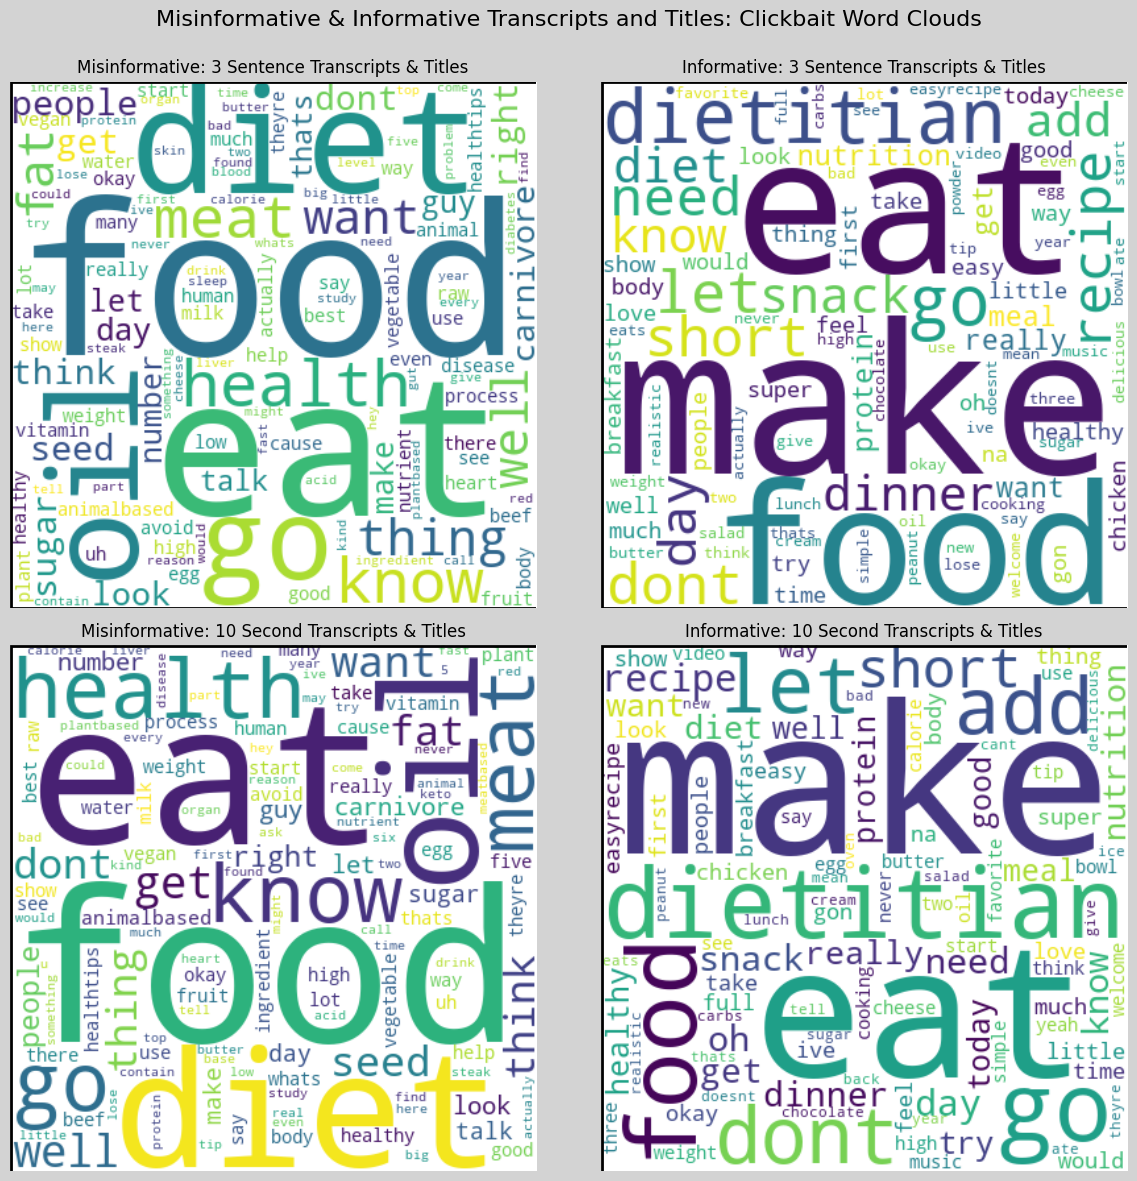

In [152]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a function to plot a word cloud with a border
def plot_word_cloud_with_border(word_counts, title):
    wordcloud = WordCloud(width=400, height=400, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(word_counts)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.gca().set_frame_on(False) # Turn off the frame to avoid extra padding
    plt.axis("off")

    # Add a border
    plt.gca().add_artist(plt.Rectangle((0, 0), 400, 400, edgecolor='black', linewidth=2, fill=False))

# Create a new figure with a specified background color
plt.figure(figsize=(12, 12), facecolor='lightgrey')  # Change the facecolor parameter to the desired background color

# Add main title above the grid
plt.suptitle("Misinformative & Informative Transcripts and Titles: Clickbait Word Clouds\n", fontsize=16)

# Plot Misinformative Clickbait: 3 Sentence Transcript + Title
plt.subplot(2, 2, 1)
plot_word_cloud_with_border(mis_word_counts_sentences, "Misinformative: 3 Sentence Transcripts & Titles")

# Plot Informative Clickbait: 3 Sentence Transcript + Title
plt.subplot(2, 2, 2)
plot_word_cloud_with_border(info_word_counts_sentences, "Informative: 3 Sentence Transcripts & Titles")

# Plot Misinformative Clickbait: 10 Second Transcript + Title
plt.subplot(2, 2, 3)
plot_word_cloud_with_border(mis_word_counts_seconds, "Misinformative: 10 Second Transcripts & Titles")

# Plot Informative Clickbait: 10 Second Transcript + Title
plt.subplot(2, 2, 4)
plot_word_cloud_with_border(info_word_counts_seconds, "Informative: 10 Second Transcripts & Titles")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Bar Charts/Histograms

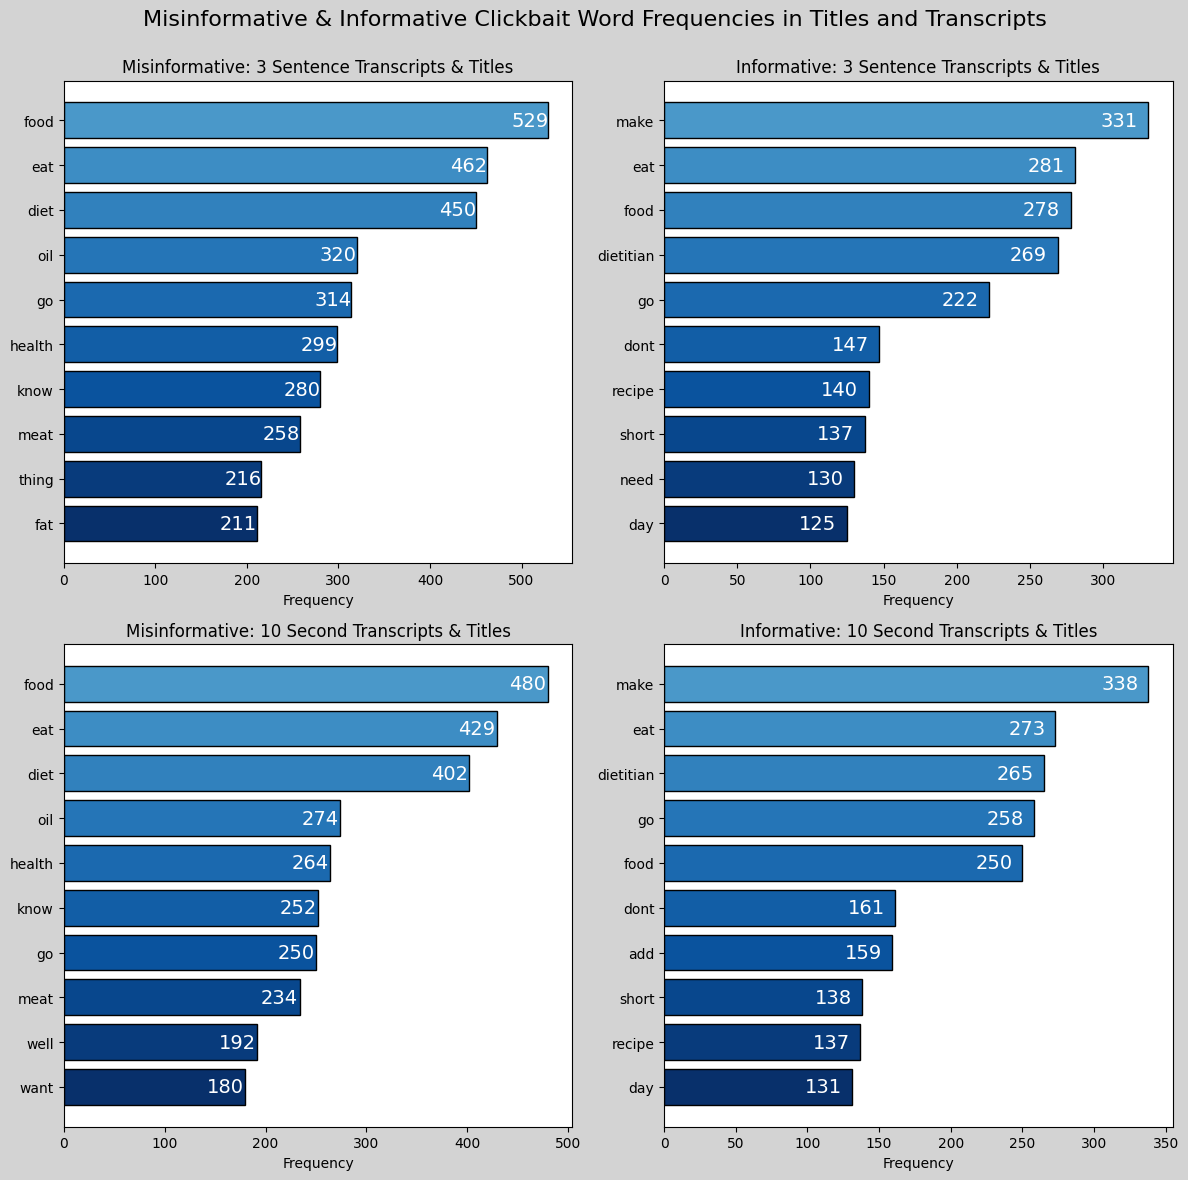

In [155]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for generating colors

stop_words = ["im", "one", "let", "get", "like", "youre"]

# Define a function to plot a bar chart with black borders around bars
def plot_bar_chart(word_counts, title):
    # Filter out stop words from word_counts
    word_counts_filtered = word_counts[~word_counts.index.isin(stop_words)]

    # Take the top ten most frequent words after filtering
    word_counts_top_ten = word_counts_filtered.head(10)

    # Generate 10 different shades of sky blue
    skyblue_colors = plt.get_cmap('Blues')(np.linspace(0.6, 1, 10))

    bars = plt.barh(word_counts_top_ten.index, word_counts_top_ten.values, color=skyblue_colors)
    for bar in bars:
        bar.set_edgecolor('black')  # Set black border color for each bar
        width = bar.get_width()
        plt.text(width - 20, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center', color='white', fontsize=14)  # Add count on the right side with padding
    plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
    plt.title(title)
    plt.xlabel('Frequency')



# Create a new figure
plt.figure(figsize=(12, 12), facecolor='lightgrey')

# Add main title above the grid
plt.suptitle("Misinformative & Informative Clickbait Word Frequencies in Titles and Transcripts\n", fontsize=16)

# Plot Misinformative Clickbait: 3 Sentence Transcript + Title
plt.subplot(2, 2, 1)
plot_bar_chart(misinfo_3s_word_counts, "Misinformative: 3 Sentence Transcripts & Titles")

# Plot Informative Clickbait: 3 Sentence Transcript + Title
plt.subplot(2, 2, 2)
plot_bar_chart(info_3s_word_counts, "Informative: 3 Sentence Transcripts & Titles")

# Plot Misinformative Clickbait: 10 Second Transcript + Title
plt.subplot(2, 2, 3)
plot_bar_chart(misinfo_10s_word_counts, "Misinformative: 10 Second Transcripts & Titles")

# Plot Informative Clickbait: 10 Second Transcript + Title
plt.subplot(2, 2, 4)
plot_bar_chart(info_10s_word_counts, "Informative: 10 Second Transcripts & Titles")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# K-Means Clustering

In [298]:
# Combine titles and ten-second captions for misinformation
misinfo_df = pd.merge(mis_titles_df, mis_clickbait_transcripts_df, on='Video ID', how='inner')

# Combine titles and ten-second captions for information
info_df = pd.merge(info_titles_df, info_clickbait_transcripts_df, on='Video ID', how='inner')

In [299]:
# preprocess titles
info_df['Title'] = info_df['Title'].apply(clean_tokenize_text)
misinfo_df['Title'] = misinfo_df['Title'].apply(clean_tokenize_text)

In [300]:
info_df

,Video ID,Title,Transcript
0,do8O1YxzdVg,salad box dont veggie short,if you don't like eating veggies this video is...
1,bpsKYwQffes,episode 15 realistic nutrition tip short,if you are not freezing your rice this is your...
2,9RO83PiuQ-A,episode 14 realistic nutrition tip short,if you don't like cooking and washing dishes b...
3,dI-Be4IehyQ,instead sheet pan dinner try sheet pan breakfa...,you've heard of sheep pan dinners but have you...
4,O_7ZvwhzqGg,favorite salad box short,if you like salads but hate preparing them thi...
...,...,...,...
754,h1HN1mUtlBE,dont demonize judge page victoryhand food diet...,here's what your favorite foods say about you ...
755,0pCBZYrGWqY,regular dietitian cool dietitian smilingfacewi...,hear my thoughts on nutrition Trends and fads ...
756,wkvxzcQEXoE,chicken nugget make appearance kitchen every w...,do you need a super simple thinner and I mean ...
757,9r3uCzlBHIg,easy blw breakfast pancake,I'm a dietitian and a mom who does baby lead w...


## Feature Extraction
- Word Frequencies
- Sentiment Scores
- Text Lengths
- Readability Scores
- TF-IDF
- Parts of Speech (POS) Tagging
- Named Entity Recognition (NER) Frequencies
- Topic Modeling: Latent Dirichlet Allocation (LDA)
---
### Word Frequencies

In [301]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from collections import Counter

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

def extract_word_frequencies(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Remove non-alphabetic characters
    filtered_tokens = [word for word in filtered_tokens if re.match('^[a-zA-Z]+$', word)]
    # Count word frequencies
    word_freq = Counter(filtered_tokens)
    return word_freq

def convert_counter_to_numeric(counter):
    # Convert Counter object to a list of values
    return list(counter.values())

# Initialize lists to store word frequencies for titles and transcripts separately
info_title_word_frequencies = []
info_transcript_word_frequencies = []
misinfo_title_word_frequencies = []
misinfo_transcript_word_frequencies = []

# Iterate through info_df
for index, row in info_df.iterrows():
    # Extract word frequencies for title and transcript
    title_word_freq = extract_word_frequencies(row['Title'])
    transcript_word_freq = extract_word_frequencies(row['Transcript'])
    # Convert word frequencies to numeric representation
    title_word_freq_values = convert_counter_to_numeric(title_word_freq)
    transcript_word_freq_values = convert_counter_to_numeric(transcript_word_freq)
    # Append word frequencies to respective lists along with the video ID
    info_title_word_frequencies.append((row['Video ID'], title_word_freq_values))
    info_transcript_word_frequencies.append((row['Video ID'], transcript_word_freq_values))

# Iterate through misinfo_df
for index, row in misinfo_df.iterrows():
    # Extract word frequencies for title and transcript
    title_word_freq = extract_word_frequencies(row['Title'])
    transcript_word_freq = extract_word_frequencies(row['Transcript'])
    # Convert word frequencies to numeric representation
    title_word_freq_values = convert_counter_to_numeric(title_word_freq)
    transcript_word_freq_values = convert_counter_to_numeric(transcript_word_freq)
    # Append word frequencies to respective lists along with the video ID
    misinfo_title_word_frequencies.append((row['Video ID'], title_word_freq_values))
    misinfo_transcript_word_frequencies.append((row['Video ID'], transcript_word_freq_values))

# Convert the word frequency lists to DataFrames for information & misinformation videos
info_title_word_freq_df = pd.DataFrame(info_title_word_frequencies, columns=['Video ID', 'Title Word Frequencies'])
info_transcript_word_freq_df = pd.DataFrame(info_transcript_word_frequencies, columns=['Video ID', 'Transcript Word Frequencies'])

misinfo_title_word_freq_df = pd.DataFrame(misinfo_title_word_frequencies, columns=['Video ID', 'Title Word Frequencies'])
misinfo_transcript_word_freq_df = pd.DataFrame(misinfo_transcript_word_frequencies, columns=['Video ID', 'Transcript Word Frequencies'])

# Verify the DataFrames
print("Information Title Word Frequencies DataFrame:")
print(info_title_word_freq_df.head())
print("\nInformation Transcript Word Frequencies DataFrame:")
print(info_transcript_word_freq_df.head())
print("\nMisinformation Title Word Frequencies DataFrame:")
print(misinfo_title_word_freq_df.head())
print("\nMisinformation Transcript Word Frequencies DataFrame:")
print(misinfo_transcript_word_freq_df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Information Title Word Frequencies DataFrame:
      Video ID    Title Word Frequencies
0  do8O1YxzdVg           [1, 1, 1, 1, 1]
1  bpsKYwQffes           [1, 1, 1, 1, 1]
2  9RO83PiuQ-A           [1, 1, 1, 1, 1]
3  dI-Be4IehyQ  [1, 2, 2, 1, 1, 1, 1, 1]
4  O_7ZvwhzqGg              [1, 1, 1, 1]

Information Transcript Word Frequencies DataFrame:
      Video ID                        Transcript Word Frequencies
0  do8O1YxzdVg  [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1  bpsKYwQffes  [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2  9RO83PiuQ-A  [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, ...
3  dI-Be4IehyQ  [2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4  O_7ZvwhzqGg  [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...

Misinformation Title Word Frequencies DataFrame:
      Video ID          Title Word Frequencies
0  zqdxQWTdIM4           [1, 1, 1, 2, 2, 1, 1]
1  aYV9EWaiz_Y        [1, 1, 1, 1, 1, 1, 1, 1]
2  G4guVvCYAEA     [1, 1, 1, 1, 1, 1, 1, 1, 1]
3  u0-U3-f4VHM        

### Sentiment Analysis Scores

In [302]:
import pandas as pd
from textblob import TextBlob

def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Initialize lists to store sentiment scores for titles and transcripts separately
info_title_sentiment_scores = []
info_transcript_sentiment_scores = []
misinfo_title_sentiment_scores = []
misinfo_transcript_sentiment_scores = []

# Iterate through info_df
for index, row in info_df.iterrows():
    # Perform sentiment analysis on title & transcript
    title_sentiment_score = get_sentiment_score(row['Title'])
    transcript_sentiment_score = get_sentiment_score(row['Transcript'])
    # Append sentiment scores to respective lists along with the video ID
    info_title_sentiment_scores.append((row['Video ID'], title_sentiment_score))
    info_transcript_sentiment_scores.append((row['Video ID'], transcript_sentiment_score))

# Iterate through misinfo_df
for index, row in misinfo_df.iterrows():
    # Perform sentiment analysis on title & transcript
    title_sentiment_score = get_sentiment_score(row['Title'])
    transcript_sentiment_score = get_sentiment_score(row['Transcript'])
    # Append sentiment scores to respective lists along with the video ID
    misinfo_title_sentiment_scores.append((row['Video ID'], title_sentiment_score))
    misinfo_transcript_sentiment_scores.append((row['Video ID'], transcript_sentiment_score))

# Convert sentiment scores to pandas DataFrames
info_title_sentiment_df = pd.DataFrame(info_title_sentiment_scores, columns=['Video ID', 'Title Sentiment Score'])
info_transcript_sentiment_df = pd.DataFrame(info_transcript_sentiment_scores, columns=['Video ID', 'Transcript Sentiment Score'])
misinfo_title_sentiment_df = pd.DataFrame(misinfo_title_sentiment_scores, columns=['Video ID', 'Title Sentiment Score'])
misinfo_transcript_sentiment_df = pd.DataFrame(misinfo_transcript_sentiment_scores, columns=['Video ID', 'Transcript Sentiment Score'])

# Verify the sentiment scores DataFrames for the first few samples
print("Information Title Sentiment Scores DataFrame:")
print(info_title_sentiment_df.head())
print("\nInformation Transcript Sentiment Scores DataFrame:")
print(info_transcript_sentiment_df.head())
print("\nMisinformation Title Sentiment Scores DataFrame:")
print(misinfo_title_sentiment_df.head())
print("\nMisinformation Transcript Sentiment Scores DataFrame:")
print(misinfo_transcript_sentiment_df.head())

Information Title Sentiment Scores DataFrame:
      Video ID  Title Sentiment Score
0  do8O1YxzdVg               0.000000
1  bpsKYwQffes               0.083333
2  9RO83PiuQ-A               0.083333
3  dI-Be4IehyQ               0.000000
4  O_7ZvwhzqGg               0.250000

Information Transcript Sentiment Scores DataFrame:
      Video ID  Transcript Sentiment Score
0  do8O1YxzdVg                    0.066667
1  bpsKYwQffes                    0.236111
2  9RO83PiuQ-A                    0.315873
3  dI-Be4IehyQ                    0.145833
4  O_7ZvwhzqGg                   -0.333333

Misinformation Title Sentiment Scores DataFrame:
      Video ID  Title Sentiment Score
0  zqdxQWTdIM4               0.433333
1  aYV9EWaiz_Y               0.000000
2  G4guVvCYAEA              -0.200000
3  u0-U3-f4VHM               0.000000
4  llDg68l626M              -0.133333

Misinformation Transcript Sentiment Scores DataFrame:
      Video ID  Transcript Sentiment Score
0  zqdxQWTdIM4                    0.2446

### Text Lengths

In [303]:
import pandas as pd

# Initialize lists to store text lengths for titles and transcripts separately
info_title_lengths = []
info_transcript_lengths = []
misinfo_title_lengths = []
misinfo_transcript_lengths = []

# Iterate through info_df
for index, row in info_df.iterrows():
    # Get the length of title and transcript
    title_length = len(row['Title'])
    transcript_length = len(row['Transcript'])
    # Append text lengths to respective lists along with the video ID
    info_title_lengths.append((row['Video ID'], title_length))
    info_transcript_lengths.append((row['Video ID'], transcript_length))

# Iterate through misinfo_df
for index, row in misinfo_df.iterrows():
    # Get the length of title and transcript
    title_length = len(row['Title'])
    transcript_length = len(row['Transcript'])
    # Append text lengths to respective lists along with the video ID
    misinfo_title_lengths.append((row['Video ID'], title_length))
    misinfo_transcript_lengths.append((row['Video ID'], transcript_length))

# Convert the text length lists to DataFrames for information & misinformation videos
info_title_lengths_df = pd.DataFrame(info_title_lengths, columns=['Video ID', 'Title Length'])
info_transcript_lengths_df = pd.DataFrame(info_transcript_lengths, columns=['Video ID', 'Transcript Length'])

misinfo_title_lengths_df = pd.DataFrame(misinfo_title_lengths, columns=['Video ID', 'Title Length'])
misinfo_transcript_lengths_df = pd.DataFrame(misinfo_transcript_lengths, columns=['Video ID', 'Transcript Length'])

# Verify the DataFrames
print("Information Title Lengths DataFrame:")
print(info_title_lengths_df.head())
print("\nInformation Transcript Lengths DataFrame:")
print(info_transcript_lengths_df.head())
print("\nMisinformation Title Lengths DataFrame:")
print(misinfo_title_lengths_df.head())
print("\nMisinformation Transcript Lengths DataFrame:")
print(misinfo_transcript_lengths_df.head())


Information Title Lengths DataFrame:
      Video ID  Title Length
0  do8O1YxzdVg            27
1  bpsKYwQffes            40
2  9RO83PiuQ-A            40
3  dI-Be4IehyQ            70
4  O_7ZvwhzqGg            24

Information Transcript Lengths DataFrame:
      Video ID  Transcript Length
0  do8O1YxzdVg                223
1  bpsKYwQffes                276
2  9RO83PiuQ-A                269
3  dI-Be4IehyQ                229
4  O_7ZvwhzqGg                225

Misinformation Title Lengths DataFrame:
      Video ID  Title Length
0  zqdxQWTdIM4            71
1  aYV9EWaiz_Y            53
2  G4guVvCYAEA            84
3  u0-U3-f4VHM            88
4  llDg68l626M            80

Misinformation Transcript Lengths DataFrame:
      Video ID  Transcript Length
0  zqdxQWTdIM4                184
1  aYV9EWaiz_Y                222
2  G4guVvCYAEA                148
3  u0-U3-f4VHM                194
4  llDg68l626M                149


### Readability Scores

In [304]:
import pandas as pd
from textstat import flesch_reading_ease

# Initialize lists to store readability scores for titles and transcripts separately
info_title_readability_scores = []
info_transcript_readability_scores = []
misinfo_title_readability_scores = []
misinfo_transcript_readability_scores = []

# Iterate through info_df
for index, row in info_df.iterrows():
    # Calculate readability scores for title and transcript
    title_score = flesch_reading_ease(row['Title'])
    transcript_score = flesch_reading_ease(row['Transcript'])
    # Append readability scores to respective lists along with the video ID
    info_title_readability_scores.append((row['Video ID'], title_score))
    info_transcript_readability_scores.append((row['Video ID'], transcript_score))

# Iterate through misinfo_df
for index, row in misinfo_df.iterrows():
    # Calculate readability scores for title and transcript
    title_score = flesch_reading_ease(row['Title'])
    transcript_score = flesch_reading_ease(row['Transcript'])
    # Append readability scores to respective lists along with the video ID
    misinfo_title_readability_scores.append((row['Video ID'], title_score))
    misinfo_transcript_readability_scores.append((row['Video ID'], transcript_score))

# Convert the readability score lists to DataFrames for information & misinformation videos
info_title_readability_df = pd.DataFrame(info_title_readability_scores, columns=['Video ID', 'Title Readability'])
info_transcript_readability_df = pd.DataFrame(info_transcript_readability_scores, columns=['Video ID', 'Transcript Readability'])
misinfo_title_readability_df = pd.DataFrame(misinfo_title_readability_scores, columns=['Video ID', 'Title Readability'])
misinfo_transcript_readability_df = pd.DataFrame(misinfo_transcript_readability_scores, columns=['Video ID', 'Transcript Readability'])

# Verify the DataFrames
print("Information Title Readability Scores DataFrame:")
print(info_title_readability_df.head())
print("\nInformation Transcript Readability Scores DataFrame:")
print(info_transcript_readability_df.head())
print("\nMisinformation Title Readability Scores DataFrame:")
print(misinfo_title_readability_df.head())
print("\nMisinformation Transcript Readability Scores DataFrame:")
print(misinfo_transcript_readability_df.head())


Information Title Readability Scores DataFrame:
      Video ID  Title Readability
0  do8O1YxzdVg              83.32
1  bpsKYwQffes              48.47
2  9RO83PiuQ-A              48.47
3  dI-Be4IehyQ              52.87
4  O_7ZvwhzqGg              75.88

Information Transcript Readability Scores DataFrame:
      Video ID  Transcript Readability
0  do8O1YxzdVg                   44.75
1  bpsKYwQffes                   50.51
2  9RO83PiuQ-A                   38.66
3  dI-Be4IehyQ                   56.26
4  O_7ZvwhzqGg                   51.18

Misinformation Title Readability Scores DataFrame:
      Video ID  Title Readability
0  zqdxQWTdIM4              11.58
1  aYV9EWaiz_Y              87.72
2  G4guVvCYAEA              11.58
3  u0-U3-f4VHM              28.50
4  llDg68l626M              60.31

Misinformation Transcript Readability Scores DataFrame:
      Video ID  Transcript Readability
0  zqdxQWTdIM4                   58.29
1  aYV9EWaiz_Y                   67.09
2  G4guVvCYAEA                

### Term Frequency Inverse Document Frequency (TF-IDF)

In [305]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine title and transcript text for both information and misinformation dataframes
info_text = info_df['Title'] + ' ' + info_df['Transcript']
misinfo_text = misinfo_df['Title'] + ' ' + misinfo_df['Transcript']

# Initialize TfidfVectorizer for titles and transcripts combined
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Concatenate the Series objects
combined_text = pd.concat([info_text, misinfo_text])

# Fit and transform the combined text data to calculate TF-IDF scores
combined_tfidf = tfidf_vectorizer.fit_transform(combined_text)

# Split the TF-IDF matrix into information and misinformation parts
info_tfidf = combined_tfidf[:len(info_text)]
misinfo_tfidf = combined_tfidf[len(info_text):]

# Convert TF-IDF matrices to DataFrames
info_tfidf_df = pd.DataFrame(info_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
misinfo_tfidf_df = pd.DataFrame(misinfo_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [178]:
info_tfidf_df

,000,10,100,105,108,10x,11,110,115,12,...,zebra,zero,zesty,zillion,zinc,zip,zones,zoodles,zookeepers,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Parts of Speech Tagging

In [306]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_pos_tag_frequencies(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    # Count POS tag frequencies
    pos_tag_freq = Counter(tag for word, tag in pos_tags)
    return pos_tag_freq

# Initialize lists to store POS tag frequencies for titles and transcripts separately
info_title_pos_tag_freqs = []
info_transcript_pos_tag_freqs = []
misinfo_title_pos_tag_freqs = []
misinfo_transcript_pos_tag_freqs = []

# Iterate through info_df
for index, row in info_df.iterrows():
    # Extract POS tag frequencies for title and transcript
    title_pos_tag_freq = extract_pos_tag_frequencies(row['Title'])
    transcript_pos_tag_freq = extract_pos_tag_frequencies(row['Transcript'])
    # Append POS tag frequencies to respective lists along with the video ID
    info_title_pos_tag_freqs.append((row['Video ID'], title_pos_tag_freq))
    info_transcript_pos_tag_freqs.append((row['Video ID'], transcript_pos_tag_freq))

# Iterate through misinfo_df
for index, row in misinfo_df.iterrows():
    # Extract POS tag frequencies for title and transcript
    title_pos_tag_freq = extract_pos_tag_frequencies(row['Title'])
    transcript_pos_tag_freq = extract_pos_tag_frequencies(row['Transcript'])
    # Append POS tag frequencies to respective lists along with the video ID
    misinfo_title_pos_tag_freqs.append((row['Video ID'], title_pos_tag_freq))
    misinfo_transcript_pos_tag_freqs.append((row['Video ID'], transcript_pos_tag_freq))

# Convert POS tag frequencies to pandas DataFrames
info_title_pos_tag_df = pd.DataFrame(info_title_pos_tag_freqs, columns=['Video ID', 'Title POS Tag Frequencies'])
info_transcript_pos_tag_df = pd.DataFrame(info_transcript_pos_tag_freqs, columns=['Video ID', 'Transcript POS Tag Frequencies'])
misinfo_title_pos_tag_df = pd.DataFrame(misinfo_title_pos_tag_freqs, columns=['Video ID', 'Title POS Tag Frequencies'])
misinfo_transcript_pos_tag_df = pd.DataFrame(misinfo_transcript_pos_tag_freqs, columns=['Video ID', 'Transcript POS Tag Frequencies'])

# Verify the POS tag frequencies DataFrames for the first few samples
print("Information Title POS Tag Frequencies DataFrame:")
print(info_title_pos_tag_df.head())
print("\nInformation Transcript POS Tag Frequencies DataFrame:")
print(info_transcript_pos_tag_df.head())
print("\nMisinformation Title POS Tag Frequencies DataFrame:")
print(misinfo_title_pos_tag_df.head())
print("\nMisinformation Transcript POS Tag Frequencies DataFrame:")
print(misinfo_transcript_pos_tag_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Information Title POS Tag Frequencies DataFrame:
      Video ID             Title POS Tag Frequencies
0  do8O1YxzdVg                    {'NN': 4, 'JJ': 1}
1  bpsKYwQffes  {'RB': 1, 'CD': 1, 'JJ': 2, 'NN': 2}
2  9RO83PiuQ-A  {'RB': 1, 'CD': 1, 'JJ': 2, 'NN': 2}
3  dI-Be4IehyQ  {'RB': 1, 'NN': 7, 'VB': 1, 'IN': 1}
4  O_7ZvwhzqGg                    {'JJ': 2, 'NN': 2}

Information Transcript POS Tag Frequencies DataFrame:
      Video ID                     Transcript POS Tag Frequencies
0  do8O1YxzdVg  {'IN': 6, 'PRP': 7, 'VBP': 5, 'RB': 5, 'VB': 2...
1  bpsKYwQffes  {'IN': 5, 'PRP': 7, 'VBP': 3, 'RB': 5, 'VBG': ...
2  9RO83PiuQ-A  {'IN': 4, 'PRP': 3, 'VBP': 3, 'RB': 4, 'VB': 4...
3  dI-Be4IehyQ  {'PRP': 4, 'VBP': 4, 'VBN': 2, 'IN': 6, 'JJ': ...
4  O_7ZvwhzqGg  {'IN': 8, 'PRP': 5, 'VBP': 3, 'NNS': 4, 'CC': ...

Misinformation Title POS Tag Frequencies DataFrame:
      Video ID                          Title POS Tag Frequencies
0  zqdxQWTdIM4                       {'NN': 7, 'JJS': 1, 'JJ': 

### Named Entity Recognition (NER) Frequencies

In [307]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import ne_chunk
from collections import Counter

# Download necessary resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def extract_ner_frequencies(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Perform NER
    ner_tags = ne_chunk(nltk.pos_tag(tokens))
    # Filter out named entities
    named_entities = [chunk for chunk in ner_tags if hasattr(chunk, 'label')]
    # Count NER frequencies
    ner_freq = Counter(chunk.label() for chunk in named_entities)
    return ner_freq

# Initialize lists to store NER frequencies for titles and transcripts separately
info_title_ner_freqs = []
info_transcript_ner_freqs = []
misinfo_title_ner_freqs = []
misinfo_transcript_ner_freqs = []

# Iterate through info_df
for index, row in info_df.iterrows():
    # Extract NER frequencies for title and transcript
    title_ner_freq = extract_ner_frequencies(row['Title'])
    transcript_ner_freq = extract_ner_frequencies(row['Transcript'])
    # Append NER frequencies to respective lists along with the video ID
    info_title_ner_freqs.append((row['Video ID'], title_ner_freq))
    info_transcript_ner_freqs.append((row['Video ID'], transcript_ner_freq))

# Iterate through misinfo_df
for index, row in misinfo_df.iterrows():
    # Extract NER frequencies for title and transcript
    title_ner_freq = extract_ner_frequencies(row['Title'])
    transcript_ner_freq = extract_ner_frequencies(row['Transcript'])
    # Append NER frequencies to respective lists along with the video ID
    misinfo_title_ner_freqs.append((row['Video ID'], title_ner_freq))
    misinfo_transcript_ner_freqs.append((row['Video ID'], transcript_ner_freq))

# Convert NER frequencies to pandas DataFrames
info_title_ner_df = pd.DataFrame(info_title_ner_freqs, columns=['Video ID', 'Title NER Frequencies'])
info_transcript_ner_df = pd.DataFrame(info_transcript_ner_freqs, columns=['Video ID', 'Transcript NER Frequencies'])
misinfo_title_ner_df = pd.DataFrame(misinfo_title_ner_freqs, columns=['Video ID', 'Title NER Frequencies'])
misinfo_transcript_ner_df = pd.DataFrame(misinfo_transcript_ner_freqs, columns=['Video ID', 'Transcript NER Frequencies'])

# Verify the NER frequencies DataFrames for the first few samples
print("Information Title NER Frequencies DataFrame:")
print(info_title_ner_df.head())
print("\nInformation Transcript NER Frequencies DataFrame:")
print(info_transcript_ner_df.head())
print("\nMisinformation Title NER Frequencies DataFrame:")
print(misinfo_title_ner_df.head())
print("\nMisinformation Transcript NER Frequencies DataFrame:")
print(misinfo_transcript_ner_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\baerg\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Information Title NER Frequencies DataFrame:
      Video ID Title NER Frequencies
0  do8O1YxzdVg                    {}
1  bpsKYwQffes                    {}
2  9RO83PiuQ-A                    {}
3  dI-Be4IehyQ                    {}
4  O_7ZvwhzqGg                    {}

Information Transcript NER Frequencies DataFrame:
      Video ID Transcript NER Frequencies
0  do8O1YxzdVg                         {}
1  bpsKYwQffes                         {}
2  9RO83PiuQ-A                         {}
3  dI-Be4IehyQ              {'PERSON': 2}
4  O_7ZvwhzqGg              {'PERSON': 1}

Misinformation Title NER Frequencies DataFrame:
      Video ID Title NER Frequencies
0  zqdxQWTdIM4                    {}
1  aYV9EWaiz_Y                    {}
2  G4guVvCYAEA                    {}
3  u0-U3-f4VHM                    {}
4  llDg68l626M                    {}

Misinformation Transcript NER Frequencies DataFrame:
      Video ID Transcript NER Frequencies
0  zqdxQWTdIM4                         {}
1  aYV9EWaiz_Y       

### Topic Modeling: Latent Dirichlet Allocation (LDA)

In [308]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer to convert text to numerical format
vectorizer_title = CountVectorizer(stop_words='english')
vectorizer_transcript = CountVectorizer(stop_words='english')

# Fit and transform the title and transcript text data to create document-term matrices
info_title_dtm = vectorizer_title.fit_transform(info_df['Title'])
info_transcript_dtm = vectorizer_transcript.fit_transform(info_df['Transcript'])

misinfo_title_dtm = vectorizer_title.fit_transform(misinfo_df['Title'])
misinfo_transcript_dtm = vectorizer_transcript.fit_transform(misinfo_df['Transcript'])

# Initialize LDA models
num_topics = 10  # Number of topics to identify
lda_info_title = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_info_transcript = LatentDirichletAllocation(n_components=num_topics, random_state=42)

lda_misinfo_title = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_misinfo_transcript = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA models to the document-term matrices for titles and transcripts
info_title_topic_dists = lda_info_title.fit_transform(info_title_dtm)
info_transcript_topic_dists = lda_info_transcript.fit_transform(info_transcript_dtm)

misinfo_title_topic_dists = lda_misinfo_title.fit_transform(misinfo_title_dtm)
misinfo_transcript_topic_dists = lda_misinfo_transcript.fit_transform(misinfo_transcript_dtm)

# Store the topic distributions in DataFrames
info_title_topic_dists_df = pd.DataFrame(info_title_topic_dists, columns=[f"Title_Topic_{i}" for i in range(num_topics)])
info_transcript_topic_dists_df = pd.DataFrame(info_transcript_topic_dists, columns=[f"Transcript_Topic_{i}" for i in range(num_topics)])
misinfo_title_topic_dists_df = pd.DataFrame(misinfo_title_topic_dists, columns=[f"Title_Topic_{i}" for i in range(num_topics)])
misinfo_transcript_topic_dists_df = pd.DataFrame(misinfo_transcript_topic_dists, columns=[f"Transcript_Topic_{i}" for i in range(num_topics)])

# Verify the topic distributions for the first few samples
print("Information Title Topic Distributions:")
print(info_title_topic_dists_df.head())
print("\nInformation Transcript Topic Distributions:")
print(info_transcript_topic_dists_df.head())
print("\nMisinformation Title Topic Distributions:")
print(misinfo_title_topic_dists_df.head())
print("\nMisinformation Transcript Topic Distributions:")
print(misinfo_transcript_topic_dists_df.head())


Information Title Topic Distributions:
   Title_Topic_0  Title_Topic_1  Title_Topic_2  Title_Topic_3  Title_Topic_4  \
0       0.016668       0.849982       0.016671       0.016667       0.016673   
1       0.014286       0.871424       0.014286       0.014286       0.014286   
2       0.014286       0.726281       0.014286       0.159428       0.014286   
3       0.009094       0.708773       0.009096       0.009091       0.009095   
4       0.020000       0.819984       0.020004       0.020004       0.020001   

   Title_Topic_5  Title_Topic_6  Title_Topic_7  Title_Topic_8  Title_Topic_9  
0       0.016667       0.016669       0.016667       0.016670       0.016667  
1       0.014286       0.014286       0.014286       0.014288       0.014286  
2       0.014286       0.014286       0.014286       0.014289       0.014286  
3       0.009094       0.009093       0.009092       0.218481       0.009091  
4       0.020000       0.020001       0.020000       0.020005       0.020000  

Infor

### Combining the Data

In [309]:
# Merge all the extracted features into misinfo_df and info_df based on the 'Video ID'

# Merge word frequencies
misinfo_df = pd.merge(misinfo_df, misinfo_title_word_freq_df, on='Video ID', how='left')
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_word_freq_df, on='Video ID', how='left')

info_df = pd.merge(info_df, info_title_word_freq_df, on='Video ID', how='left')
info_df = pd.merge(info_df, info_transcript_word_freq_df, on='Video ID', how='left')

# Merge sentiment scores
misinfo_df = pd.merge(misinfo_df, misinfo_title_sentiment_df, on='Video ID', how='left')
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_sentiment_df, on='Video ID', how='left')

info_df = pd.merge(info_df, info_title_sentiment_df, on='Video ID', how='left')
info_df = pd.merge(info_df, info_transcript_sentiment_df, on='Video ID', how='left')

# Merge text lengths
misinfo_df = pd.merge(misinfo_df, misinfo_title_lengths_df, on='Video ID', how='left')
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_lengths_df, on='Video ID', how='left')

info_df = pd.merge(info_df, info_title_lengths_df, on='Video ID', how='left')
info_df = pd.merge(info_df, info_transcript_lengths_df, on='Video ID', how='left')

# Merge readability scores
misinfo_df = pd.merge(misinfo_df, misinfo_title_readability_df, on='Video ID', how='left')
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_readability_df, on='Video ID', how='left')

info_df = pd.merge(info_df, info_title_readability_df, on='Video ID', how='left')
info_df = pd.merge(info_df, info_transcript_readability_df, on='Video ID', how='left')

# Merge TF-IDF matrices
misinfo_df = pd.merge(misinfo_df, misinfo_tfidf_df, left_index=True, right_index=True)
info_df = pd.merge(info_df, info_tfidf_df, left_index=True, right_index=True)

# Merge POS tag frequencies
misinfo_df = pd.merge(misinfo_df, misinfo_title_pos_tag_df, on='Video ID', how='left')
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_pos_tag_df, on='Video ID', how='left')

info_df = pd.merge(info_df, info_title_pos_tag_df, on='Video ID', how='left')
info_df = pd.merge(info_df, info_transcript_pos_tag_df, on='Video ID', how='left')

# Merge NER frequencies
misinfo_df = pd.merge(misinfo_df, misinfo_title_ner_df, on='Video ID', how='left')
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_ner_df, on='Video ID', how='left')

info_df = pd.merge(info_df, info_title_ner_df, on='Video ID', how='left')
info_df = pd.merge(info_df, info_transcript_ner_df, on='Video ID', how='left')

# Merge topic distributions
misinfo_df = pd.merge(misinfo_df, misinfo_title_topic_dists_df, left_index=True, right_index=True)
misinfo_df = pd.merge(misinfo_df, misinfo_transcript_topic_dists_df, left_index=True, right_index=True)

info_df = pd.merge(info_df, info_title_topic_dists_df, left_index=True, right_index=True)
info_df = pd.merge(info_df, info_transcript_topic_dists_df, left_index=True, right_index=True)


In [310]:
misinfo_df

,Video ID,Title,Transcript,Title Word Frequencies,Transcript Word Frequencies,Title Sentiment Score,Transcript Sentiment Score,Title Length,Transcript Length,Title Readability,...,Transcript_Topic_0,Transcript_Topic_1,Transcript_Topic_2,Transcript_Topic_3,Transcript_Topic_4,Transcript_Topic_5,Transcript_Topic_6,Transcript_Topic_7,Transcript_Topic_8,Transcript_Topic_9
0,zqdxQWTdIM4,absolute best natural vitamin arthritis vitami...,I'm going to show you the absolute best natura...,"[1, 1, 1, 2, 2, 1, 1]","[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]",0.433333,0.244615,71,184,11.58,...,0.006668,0.006668,0.006668,0.006668,0.006668,0.939986,0.006669,0.006669,0.006669,0.006668
1,aYV9EWaiz_Y,3 tip lose weight sleep health weightloss keto...,I'm going to give you three tips to help you l...,"[1, 1, 1, 1, 1, 1, 1, 1]","[2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ...",0.000000,0.350000,53,222,87.72,...,0.005556,0.005556,0.005556,0.005556,0.316482,0.005557,0.005556,0.639066,0.005557,0.005557
2,G4guVvCYAEA,discover big culprit behind inflammation ultra...,the absolute number one most inflammatory food...,"[1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]",-0.200000,0.366667,84,148,11.58,...,0.007144,0.007145,0.007144,0.935701,0.007144,0.007146,0.007145,0.007144,0.007144,0.007144
3,u0-U3-f4VHM,explore health advantage provide ginger video ...,you know if you went to your kitchen right now...,"[1, 1, 1, 1, 2, 1, 1, 1]","[1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.000000,0.285714,88,194,28.50,...,0.005883,0.005884,0.947045,0.005883,0.005884,0.005884,0.005885,0.005885,0.005884,0.005883
4,llDg68l626M,crave kfc poultrylegfrenchfries next run disco...,all right we're at our favorite restaurant KFC...,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1]","[3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]",-0.133333,0.339286,80,149,60.31,...,0.006668,0.006668,0.939988,0.006668,0.006668,0.006668,0.006669,0.006668,0.006668,0.006668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,3SHtxj9nRpM,top 5 food stay away 2023 food health guide tip,here are the top 5 foods to stay away from in ...,"[1, 2, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]",0.500000,0.330000,47,187,112.09,...,0.005556,0.005556,0.005557,0.005557,0.005556,0.949994,0.005556,0.005556,0.005556,0.005556
1265,9eeNkQNtfxY,5 simple step healthier diet diet guide stepby...,are you looking to improve your diet but don't...,"[1, 1, 1, 2, 1, 1, 1, 1, 1]","[1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]",0.000000,0.250000,76,195,42.38,...,0.005556,0.949990,0.005556,0.005557,0.005557,0.005557,0.005556,0.005557,0.005557,0.005557
1266,PdLrENnDPbA,5 simple step creat healthy balance diet 2023 ...,here are five simple steps to help you create ...,"[1, 1, 1, 1, 1, 2, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.250000,0.250000,77,143,66.74,...,0.006667,0.427400,0.006668,0.006667,0.006668,0.006668,0.006668,0.519260,0.006667,0.006668
1267,ffF45hF4NV0,chase dream excuse chaseyourdreams mindset mot...,chase your dreams not excuses stop making reas...,"[1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]",-0.050000,0.000000,60,151,30.53,...,0.008335,0.008335,0.924990,0.008334,0.008335,0.008335,0.008334,0.008334,0.008334,0.008334


In [311]:
info_df


,Video ID,Title,Transcript,Title Word Frequencies,Transcript Word Frequencies,Title Sentiment Score,Transcript Sentiment Score,Title Length,Transcript Length,Title Readability,...,Transcript_Topic_0,Transcript_Topic_1,Transcript_Topic_2,Transcript_Topic_3,Transcript_Topic_4,Transcript_Topic_5,Transcript_Topic_6,Transcript_Topic_7,Transcript_Topic_8,Transcript_Topic_9
0,do8O1YxzdVg,salad box dont veggie short,if you don't like eating veggies this video is...,"[1, 1, 1, 1, 1]","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000000,0.066667,27,223,83.32,...,0.005556,0.005556,0.005557,0.005556,0.005557,0.005557,0.005557,0.005557,0.825594,0.129953
1,bpsKYwQffes,episode 15 realistic nutrition tip short,if you are not freezing your rice this is your...,"[1, 1, 1, 1, 1]","[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.083333,0.236111,40,276,48.47,...,0.004167,0.004167,0.004167,0.004167,0.004168,0.004168,0.577182,0.004169,0.004169,0.389476
2,9RO83PiuQ-A,episode 14 realistic nutrition tip short,if you don't like cooking and washing dishes b...,"[1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, ...",0.083333,0.315873,40,269,48.47,...,0.003846,0.003847,0.003847,0.497499,0.003847,0.003847,0.471726,0.003847,0.003847,0.003847
3,dI-Be4IehyQ,instead sheet pan dinner try sheet pan breakfa...,you've heard of sheep pan dinners but have you...,"[1, 2, 2, 1, 1, 1, 1, 1]","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000000,0.145833,70,229,52.87,...,0.004167,0.004168,0.004168,0.004168,0.962494,0.004168,0.004167,0.004167,0.004167,0.004167
4,O_7ZvwhzqGg,favorite salad box short,if you like salads but hate preparing them thi...,"[1, 1, 1, 1]","[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.250000,-0.333333,24,225,75.88,...,0.004348,0.004348,0.004349,0.004349,0.004348,0.004349,0.004349,0.004348,0.960863,0.004348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,h1HN1mUtlBE,dont demonize judge page victoryhand food diet...,here's what your favorite foods say about you ...,"[1, 1, 1, 1, 1, 1, 1, 1]","[3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1]",0.000000,0.285459,56,211,29.52,...,0.005556,0.005557,0.005556,0.005557,0.949989,0.005557,0.005557,0.005557,0.005557,0.005557
755,0pCBZYrGWqY,regular dietitian cool dietitian smilingfacewi...,hear my thoughts on nutrition Trends and fads ...,"[1, 2, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, ...",0.175000,0.000000,86,233,2.11,...,0.005001,0.005000,0.005001,0.005001,0.005001,0.005001,0.005001,0.005000,0.954991,0.005003
756,wkvxzcQEXoE,chicken nugget make appearance kitchen every w...,do you need a super simple thinner and I mean ...,"[1, 1, 1, 1, 1, 1, 1, 1]","[2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, ...",-0.600000,-0.144643,113,233,-80.47,...,0.004000,0.004000,0.004000,0.004001,0.004001,0.004000,0.963996,0.004000,0.004000,0.004000
757,9r3uCzlBHIg,easy blw breakfast pancake,I'm a dietitian and a mom who does baby lead w...,"[1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",0.433333,0.006250,26,262,75.88,...,0.004168,0.004167,0.004167,0.004167,0.962492,0.004167,0.004169,0.004168,0.004168,0.004167


## Normalization
### Min-Max Scaling

In [319]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

features_to_normalize = ['Title Length', 'Transcript Length',
                         'Title Readability', 'Transcript Readability']

# Drop unnecessary columns for both dataframes
misinfo_df_subset = misinfo_df.drop(columns=['Video ID', 'Title', 'Transcript', 'Title Word Frequencies', 'Transcript Word Frequencies', 'Transcript NER Frequencies', 'Title NER Frequencies', 'Title POS Tag Frequencies', 'Transcript POS Tag Frequencies'])
info_df_subset = info_df.drop(columns=['Video ID', 'Title', 'Transcript', 'Title Word Frequencies', 'Transcript Word Frequencies', 'Transcript NER Frequencies', 'Title NER Frequencies', 'Title POS Tag Frequencies', 'Transcript POS Tag Frequencies'])

# Normalize the features using Min-Max scaling for both dataframes
misinfo_df_subset[features_to_normalize] = scaler.fit_transform(misinfo_df_subset[features_to_normalize])
info_df_subset[features_to_normalize] = scaler.fit_transform(info_df_subset[features_to_normalize])


In [320]:
info_df_subset

,Title Sentiment Score,Transcript Sentiment Score,Title Length,Transcript Length,Title Readability,Transcript Readability,000,10,100,105,...,Transcript_Topic_0,Transcript_Topic_1,Transcript_Topic_2,Transcript_Topic_3,Transcript_Topic_4,Transcript_Topic_5,Transcript_Topic_6,Transcript_Topic_7,Transcript_Topic_8,Transcript_Topic_9
0,0.000000,0.066667,0.172414,0.632184,0.962668,0.402205,0.0,0.0,0.0,0.0,...,0.005556,0.005556,0.005557,0.005556,0.005557,0.005557,0.005557,0.005557,0.825594,0.129953
1,0.083333,0.236111,0.284483,0.784483,0.928340,0.447233,0.0,0.0,0.0,0.0,...,0.004167,0.004167,0.004167,0.004167,0.004168,0.004168,0.577182,0.004169,0.004169,0.389476
2,0.083333,0.315873,0.284483,0.764368,0.928340,0.354597,0.0,0.0,0.0,0.0,...,0.003846,0.003847,0.003847,0.497499,0.003847,0.003847,0.471726,0.003847,0.003847,0.003847
3,0.000000,0.145833,0.543103,0.649425,0.932674,0.492183,0.0,0.0,0.0,0.0,...,0.004167,0.004168,0.004168,0.004168,0.962494,0.004168,0.004167,0.004167,0.004167,0.004167
4,0.250000,-0.333333,0.146552,0.637931,0.955339,0.452470,0.0,0.0,0.0,0.0,...,0.004348,0.004348,0.004349,0.004349,0.004348,0.004349,0.004349,0.004348,0.960863,0.004348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,0.000000,0.285459,0.422414,0.597701,0.909674,0.492183,0.0,0.0,0.0,0.0,...,0.005556,0.005557,0.005556,0.005557,0.949989,0.005557,0.005557,0.005557,0.005557,0.005557
755,0.175000,0.000000,0.681034,0.660920,0.882675,0.468340,0.0,0.0,0.0,0.0,...,0.005001,0.005000,0.005001,0.005001,0.005001,0.005001,0.005001,0.005000,0.954991,0.005003
756,-0.600000,-0.144643,0.913793,0.660920,0.801332,0.344043,0.0,0.0,0.0,0.0,...,0.004000,0.004000,0.004000,0.004001,0.004001,0.004000,0.963996,0.004000,0.004000,0.004000
757,0.433333,0.006250,0.163793,0.744253,0.955339,0.404862,0.0,0.0,0.0,0.0,...,0.004168,0.004167,0.004167,0.004167,0.962492,0.004167,0.004169,0.004168,0.004168,0.004167


## Determining Cluster Quantity
### Elbow Method
- The elbow method is a graphical tool used to determine the optimal number of clusters in a dataset for clustering algorithms like K-means. It plots the number of clusters against the sum of squared distances of samples to their closest cluster center (inertia).
- How to interpret: Look for the "elbow" point on the plot, where the inertia starts decreasing at a slower rate. This point represents a trade-off between the number of clusters and the compactness of the clusters. The number of clusters at the elbow point is often chosen as the optimal number, but it's important to consider other factors such as the context of the problem and domain knowledge.

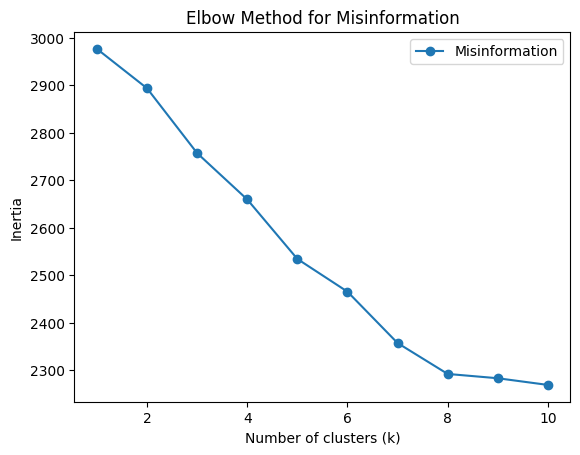

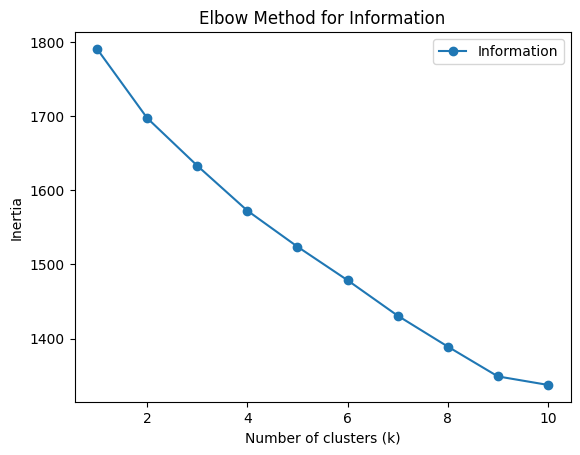

In [321]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize a list to store inertia values for both misinformation and information dataframes
misinfo_inertia = []
info_inertia = []

# Define a range of k values
k_values = range(1, 11)

# Fit K-means for each k and compute inertia for misinformation dataframe
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(misinfo_df_subset)
    misinfo_inertia.append(kmeans.inertia_)

# Fit K-means for each k and compute inertia for information dataframe
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(info_df_subset)
    info_inertia.append(kmeans.inertia_)

# Plot the elbow curve for misinformation dataframe
plt.plot(k_values, misinfo_inertia, marker='o', label='Misinformation')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Misinformation')
plt.legend()
plt.show()

# Plot the elbow curve for information dataframe
plt.plot(k_values, info_inertia, marker='o', label='Information')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Information')
plt.legend()
plt.show()


### What can we infer from these Elbow Method visuals?
1. For the most part, the lines between points decline linearly until both graphs reach their subjectively-low intertia.
2. The Misinformation grpah seems to "elbow" out at about the 8 cluster mark. The Information graph looks to "elbow" out a little further, around the 9 cluster mark.
3. 8 and 9 clusters seems to be a plausible choice according to the graphs seeing as this spot most accurately represents the border between trade-offs.

### Silhouette Scores
- The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- How to interpret: Look for the highest silhouette score, as it suggests the most appropriate number of clusters. A higher silhouette score indicates better separation and cohesion of clusters. Ensure that the silhouette score is positive, as negative values indicate poor clustering. Consistency of silhouette scores across different numbers of clusters also provides insight into the stability of the clustering solution.

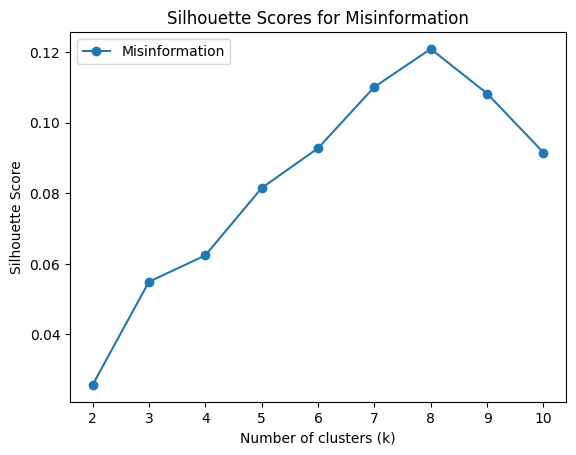

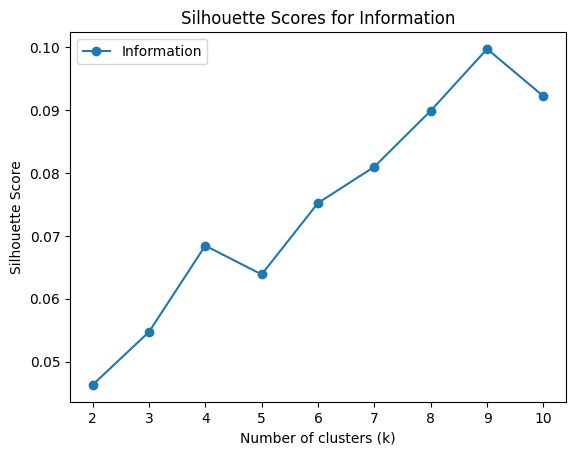

In [322]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize a list to store silhouette scores for both misinformation and information dataframes
misinfo_silhouette_scores = []
info_silhouette_scores = []

# Define a range of k values
k_values = range(2, 11)

# Compute silhouette scores for misinformation dataframe
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(misinfo_df_subset)
    silhouette_avg = silhouette_score(misinfo_df_subset, labels)
    misinfo_silhouette_scores.append(silhouette_avg)

# Compute silhouette scores for information dataframe
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(info_df_subset)
    silhouette_avg = silhouette_score(info_df_subset, labels)
    info_silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for misinformation dataframe
plt.plot(k_values, misinfo_silhouette_scores, marker='o', label='Misinformation')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Misinformation')
plt.legend()
plt.show()

# Plot the silhouette scores for information dataframe
plt.plot(k_values, info_silhouette_scores, marker='o', label='Information')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Information')
plt.legend()
plt.show()

### What can we infer from these Silhouette Score visuals?
1. Ther are a multiple peaks but we know the most accurate will be the *highest* peak on each of the graphs.
2. Without a doubt, the highest point on these graphs is at 8 (Misinformation) and 9 (Information) clusters.
3. We can infer that at 8 and 9 clusters the objects are more similar to themselves more any other cluster objects.

### Decision: What can we do with these inferences?
1. Based on the analysis so far, our best bet is to select 8 clusters for misinformation videos and 9 clusters for information videos.
2. With the chosen cluster numbers, we can proceed to apply clustering algorithms such as K-means to group the videos into distinct clusters.
3. After clustering, we should evaluate the quality of the clusters using additional metrics and domain-specific knowledge to ensure that the clustering results align with the intended objectives.

## Applying K-Means

In [347]:
from sklearn.cluster import KMeans

# Define the number of clusters
misinfo_n_clusters = 8
info_n_clusters = 9

# Initialize KMeans models
misinfo_kmeans = KMeans(n_clusters=misinfo_n_clusters, random_state=42)
info_kmeans = KMeans(n_clusters=info_n_clusters, random_state=42)

# Fit KMeans models to the normalized feature data
misinfo_clusters = misinfo_kmeans.fit_predict(misinfo_df_subset)
info_clusters = info_kmeans.fit_predict(info_df_subset)

# Add the cluster labels to the original datasets
misinfo_df['Cluster'] = misinfo_clusters
info_df['Cluster'] = info_clusters

# Display the counts of videos in each cluster for misinformation dataset
print("Misinformation Dataset - Video Counts in Each Cluster:")
print(misinfo_df['Cluster'].value_counts())

# Display the counts of videos in each cluster for information dataset
print("\nInformation Dataset - Video Counts in Each Cluster:")
print(info_df['Cluster'].value_counts())


Misinformation Dataset - Video Counts in Each Cluster:
Cluster
4    226
2    204
3    193
5    165
6    161
0    129
1    112
7     79
Name: count, dtype: int64

Information Dataset - Video Counts in Each Cluster:
Cluster
5    142
3    104
0    103
7     90
2     73
1     72
6     69
4     60
8     46
Name: count, dtype: int64


In [344]:
# Compute mean and median
misinfo_cluster_means = misinfo_df_subset['Cluster'].mean()
info_cluster_means = info_df_subset['Cluster'].mean()

misinfo_cluster_median = misinfo_df_subset['Cluster'].median()
info_cluster_median = info_df_subset['Cluster'].median()


KeyError: 'Cluster'

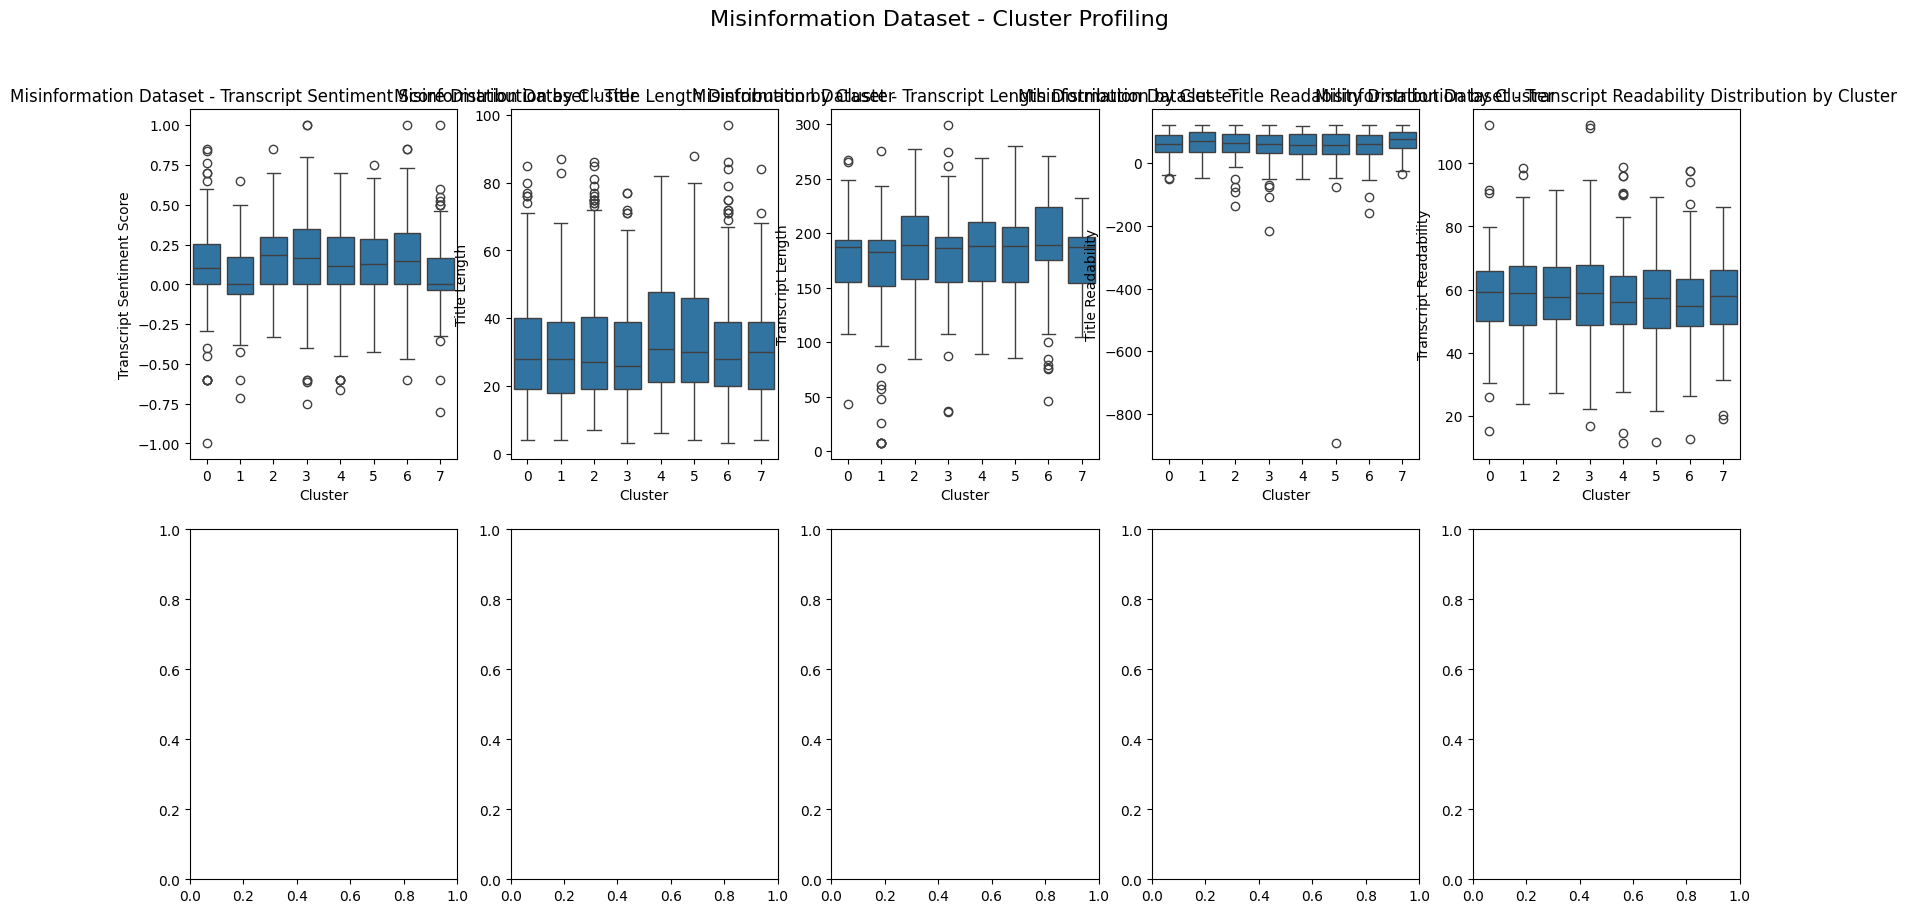

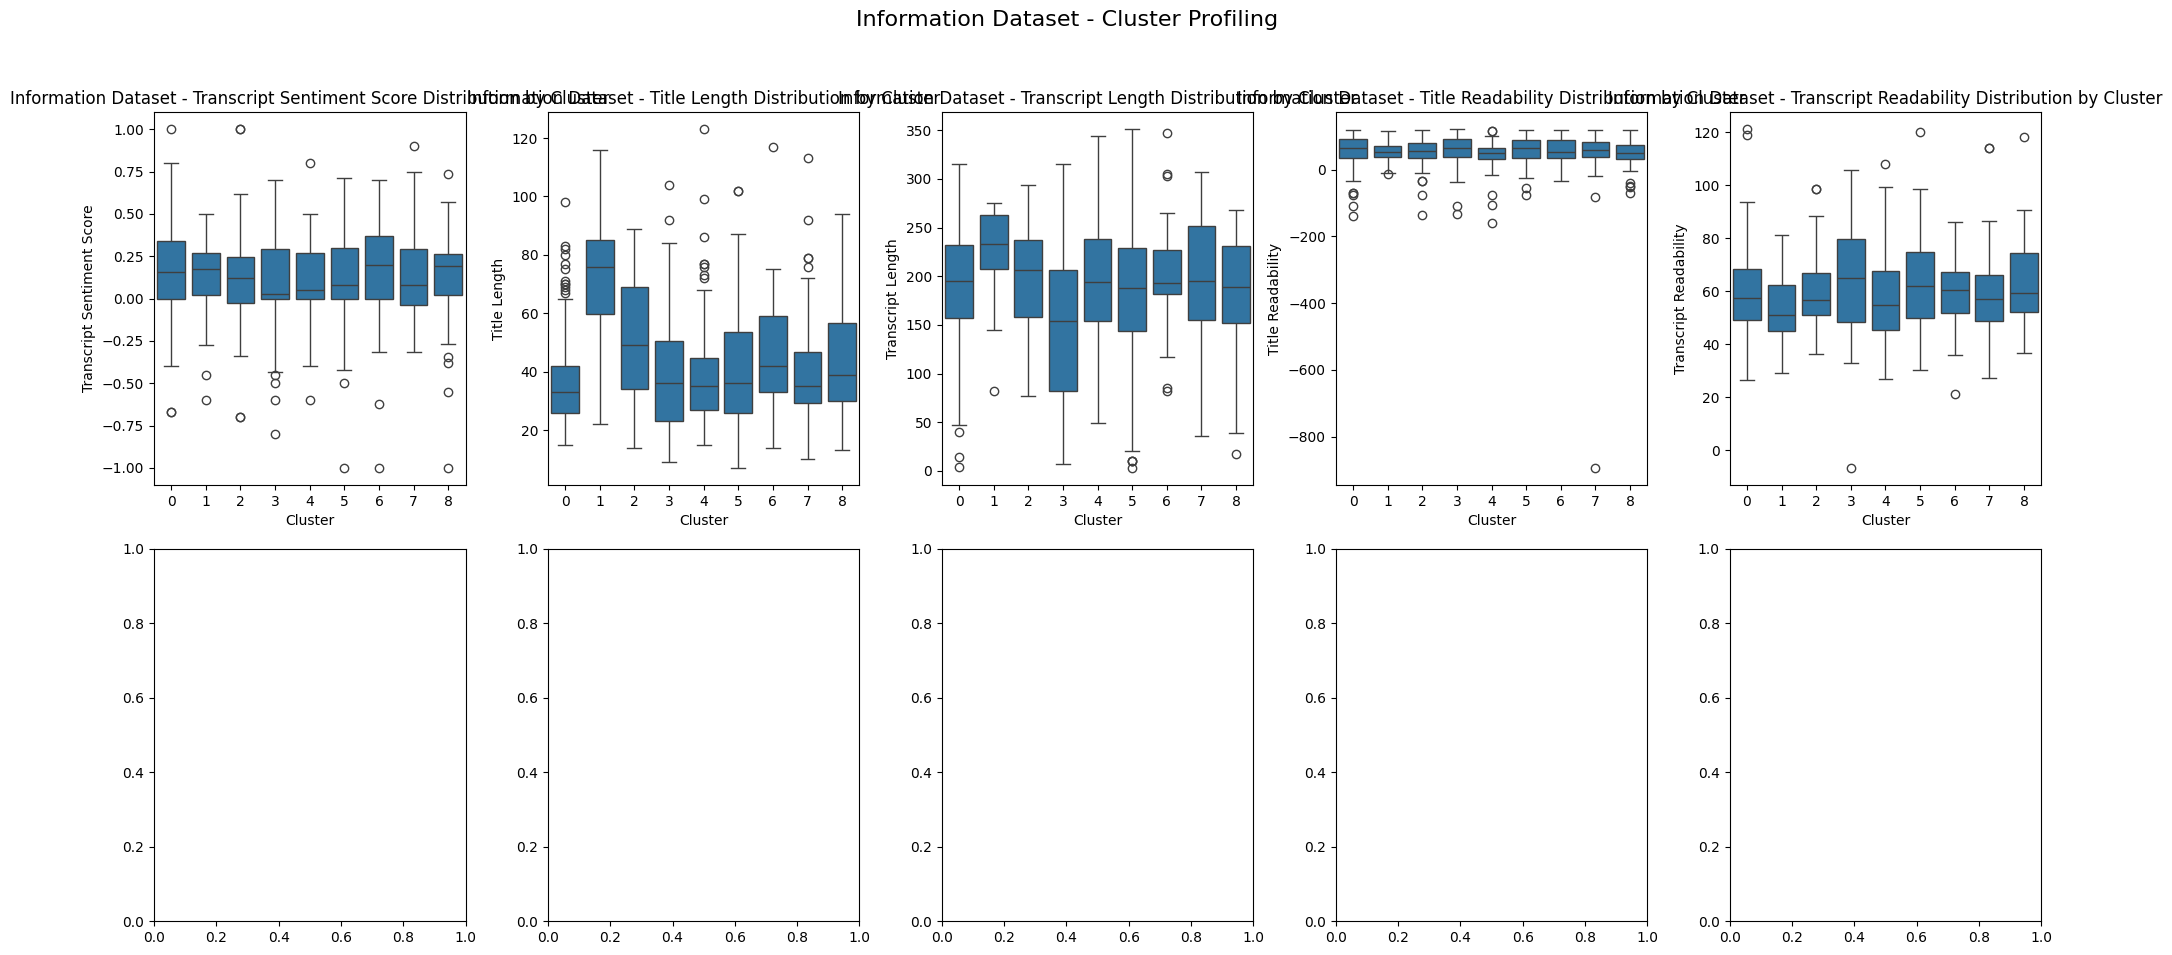

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features
features = ['Transcript Sentiment Score', 'Title Length', 'Transcript Length', 'Title Readability', 'Transcript Readability']

# Function to perform cluster profiling for a specific feature
def cluster_profile(feature, dataset_df, ax):
    sns.boxplot(x='Cluster', y=feature, data=dataset_df, ax=ax)
    ax.set_title(f'{dataset_df.name} Dataset - {feature} Distribution by Cluster')

# Create subplots for misinformation dataset
fig, axes = plt.subplots(2, len(features), figsize=(20, 10))
fig.suptitle('Misinformation Dataset - Cluster Profiling', fontsize=16)

misinfo_df.name = 'Misinformation'
for i, feature in enumerate(features):
    cluster_profile(feature, misinfo_df, axes[0, i])

# Create subplots for information dataset
fig2, axes2 = plt.subplots(2, len(features), figsize=(20, 10))
fig2.suptitle('Information Dataset - Cluster Profiling', fontsize=16)

info_df.name = 'Information'
for i, feature in enumerate(features):
    cluster_profile(feature, info_df, axes2[0, i])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

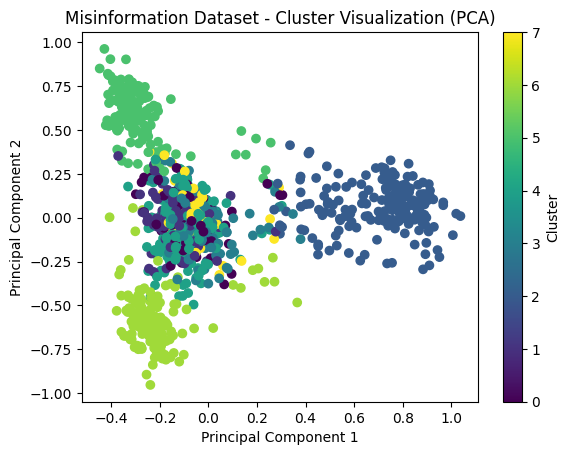

In [350]:
# Cluster Visualization with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
misinfo_pca = pca.fit_transform(misinfo_df_subset)
info_pca = pca.fit_transform(info_df_subset)

plt.scatter(misinfo_pca[:, 0], misinfo_pca[:, 1], c=misinfo_clusters, cmap='viridis')
plt.title('Misinformation Dataset - Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [351]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

misinfo_silhouette_score = silhouette_score(misinfo_df_subset, misinfo_clusters)
info_silhouette_score = silhouette_score(info_df_subset, info_clusters)

print("Misinformation Dataset - Silhouette Score:", misinfo_silhouette_score)
print("Information Dataset - Silhouette Score:", info_silhouette_score)

Misinformation Dataset - Silhouette Score: 0.12088162543510667
Information Dataset - Silhouette Score: 0.09976452299300889


In [353]:
# Cluster Comparison
misinfo_cluster_counts = misinfo_df['Cluster'].value_counts()
misinfo_cluster_percent = misinfo_df['Cluster'].value_counts(normalize=True) * 100
misinfo_cluster_distribution = pd.concat([misinfo_cluster_counts, misinfo_cluster_percent], axis=1)
misinfo_cluster_distribution.columns = ['Count', 'Percent Distribution']

info_cluster_counts = info_df['Cluster'].value_counts()
info_cluster_percent = info_df['Cluster'].value_counts(normalize=True) * 100
info_cluster_distribution = pd.concat([info_cluster_counts, info_cluster_percent], axis=1)
info_cluster_distribution.columns = ['Count', 'Percent Distribution']

print("Misinformation Dataset - Cluster Distribution:")
print(misinfo_cluster_distribution)
print("\nInformation Dataset - Cluster Distribution:")
print(info_cluster_distribution)


Misinformation Dataset - Cluster Distribution:
         Count  Percent Distribution
Cluster                             
4          226             17.809299
2          204             16.075650
3          193             15.208826
5          165             13.002364
6          161             12.687155
0          129             10.165485
1          112              8.825847
7           79              6.225374

Information Dataset - Cluster Distribution:
         Count  Percent Distribution
Cluster                             
5          142             18.708827
3          104             13.702240
0          103             13.570487
7           90             11.857708
2           73              9.617918
1           72              9.486166
6           69              9.090909
4           60              7.905138
8           46              6.060606


In [357]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Function to compute silhouette score for KMeans clustering
def compute_silhouette_score(data, features, n_clusters, random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(data[features])
    silhouette_avg = silhouette_score(data[features], cluster_labels)
    return silhouette_avg

def assess_cluster_stability(data, features, num_clusters=8, num_iterations=10):
    silhouette_scores = []  # Initialize list to store silhouette scores for each iteration

    # Repeat KMeans clustering with different random initializations
    for i in range(num_iterations):
        silhouette_avg = compute_silhouette_score(data, features, num_clusters, random_state=i)
        silhouette_scores.append(silhouette_avg)

    # Compute average silhouette score and its standard deviation
    avg_silhouette_score = np.mean(silhouette_scores)
    std_silhouette_score = np.std(silhouette_scores)

    # Print results
    print(f"Average Silhouette Score: {avg_silhouette_score}")
    print(f"Standard Deviation of Silhouette Scores: {std_silhouette_score}")

# Define features of interest
misinfo_features = ['Transcript Sentiment Score', 'Title Length', 'Transcript Length', 'Title Readability', 'Transcript Readability']
info_features = ['Transcript Sentiment Score', 'Title Length', 'Transcript Length', 'Title Readability', 'Transcript Readability']

# Assess cluster stability for misinformation dataset
print("Misinformation Dataset:")
assess_cluster_stability(misinfo_df, misinfo_features)

# Assess cluster stability for information dataset
print("\nInformation Dataset:")
assess_cluster_stability(info_df, info_features)


Misinformation Dataset:
Average Silhouette Score: 0.25851894644983725
Standard Deviation of Silhouette Scores: 0.011483009537380217

Information Dataset:
Average Silhouette Score: 0.2664662426360972
Standard Deviation of Silhouette Scores: 0.010476040490349324


In [ ]:
import numpy as np

# Plot centroids and data points for misinformation dataset
plt.figure(figsize=(10, 6))
for i in range(misinfo_n_clusters):
    cluster_data = misinfo_df_subset.to_numpy()[misinfo_clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f'Cluster {i}')
    centroid = misinfo_kmeans.cluster_centers_[i]
    plt.scatter(centroid[0], centroid[1], marker='x', color='black', s=100, label=f'Centroid {i}')

plt.title('Misinformation Dataset - KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plot centroids and data points for information dataset
plt.figure(figsize=(10, 6))
for i in range(info_n_clusters):
    cluster_data = info_df_subset.to_numpy()[info_clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f'Cluster {i}')
    centroid = info_kmeans.cluster_centers_[i]
    plt.scatter(centroid[0], centroid[1], marker='x', color='black', s=100, label=f'Centroid {i}')

plt.title('Information Dataset - KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
